In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (24, 12)

Use weekly data when analyzing crude oil ↔ gasoline interactions to capture short-term market responsiveness.



## Import Data

### Gasoline Prices 

In [2]:
gasoline_prices = pd.read_csv("datathon data/weekly_gasoline_prices.csv")

In [3]:
## 7 days intervals 
gasoline_prices['Type_Clean'].value_counts()

Type_Clean
Regular Conventional Retail Gasoline Prices              37560
Regular Reformulated Retail Gasoline Prices              37560
Regular All Formulations Retail Gasoline Prices          37560
Midgrade Conventional Retail Gasoline Prices             37560
Midgrade Reformulated Retail Gasoline Prices             37560
Midgrade All Formulations Retail Gasoline Prices         37560
Premium Conventional Retail Gasoline Prices              37560
Premium Reformulated Retail Gasoline Prices              37560
Premium All Formulations Retail Gasoline Prices          37560
All Grades Conventional Retail Gasoline Prices           37560
All Grades Reformulated Retail Gasoline Prices           37560
All Grades All Formulations Retail Gasoline Prices       37560
No 2 Diesel Retail Prices                                37560
No 2 Diesel Ultra Low Sulfur (0-15 ppm) Retail Prices    26460
Name: count, dtype: int64

### All Stocks and ETF

In [5]:
stocks  = pd.read_csv("datathon data/all_stocks_and_etfs.csv")

### Monthly Gasoline Makeup Percentage

In [7]:
makeup = pd.read_csv("datathon data/monthly_gasoline_makeup_percentages.csv")

### Weekly Supply Estimate

In [8]:
supply = pd.read_csv("datathon data/weekly_supply_estimates.csv")

### Weekly Supply from Crude Oil Commodities

In [9]:
commodity = pd.read_csv("datathon data/all_commodities.csv")

## Crude to Gasoline Pricing Dynamics

Relevant Data:
- Regular All Formulations Gas Price in the US (per week)
- commodities (per days - weekly intervals)
- Composition (make up percentage weekly)

First, we examined the correlation between different types of gasoline prices in the US—specifically, conventional and reformulated gasoline. To represent the overall market trend, we computed a weighted average of all reformulated types and used this as the weekly gas price.

Second, we investigated the relationship between weekly gasoline prices and weekly crude oil prices. To align the frequency, we aggregated daily crude oil prices into weekly features by calculating the average, maximum, and minimum prices within each week. These were resampled to Mondays to ensure temporal alignment with the weekly gasoline price data.

Third, we addressed missing values in the data using linear interpolation to maintain continuity and avoid bias in subsequent analysis.

Conclusion: Use all formulated regular gasoline prices

In [11]:
regular_formulated_gas_prices = gasoline_prices[(gasoline_prices['Type_Clean'] == 'Regular All Formulations Retail Gasoline Prices')& (gasoline_prices['Geography'] == 'US')]
regular_formulated_gas_prices['Date'] = pd.to_datetime(regular_formulated_gas_prices['Date'])
regular_formulated_gas_prices.to_csv("datathon data/gas_prices/regular_formulated_gas_prices.csv", index=False)

/var/folders/x0/l0tbxml95bn0hl8mg3ljsrr40000gn/T/ipykernel_2169/1121181157.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regular_formulated_gas_prices['Date'] = pd.to_datetime(regular_formulated_gas_prices['Date'])


Text(0.5, 1.0, 'Regular All Formulations Retail Gasoline Prices in the US')

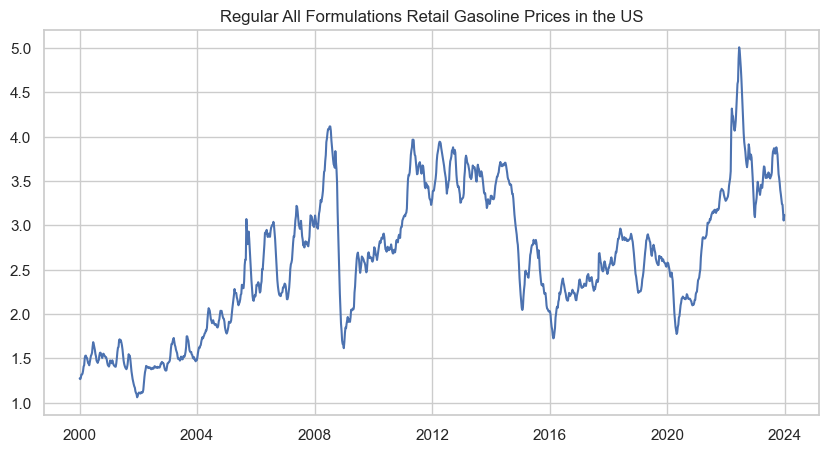

In [12]:
plt.figure(figsize=(10, 5))
plt.plot(regular_formulated_gas_prices['Date'], regular_formulated_gas_prices['Price'])
plt.title('Regular All Formulations Retail Gasoline Prices in the US')

In [13]:
regular_conventional_gas_prices = gasoline_prices[(gasoline_prices['Type_Clean'] == 'Regular Conventional Retail Gasoline Prices')& (gasoline_prices['Geography'] == 'US')]
regular_conventional_gas_prices['Date'] = pd.to_datetime(regular_conventional_gas_prices['Date'])
regular_conventional_gas_prices.to_csv("datathon data/gas_prices/regular_conventional_gas_prices.csv", index=False)

regular_reformulated_gas_price = gasoline_prices[(gasoline_prices['Type_Clean'] == 'Regular Reformulated Retail Gasoline Prices')& (gasoline_prices['Geography'] == 'US')]
regular_reformulated_gas_price['Date'] = pd.to_datetime(regular_reformulated_gas_price['Date'])
regular_reformulated_gas_price.to_csv("datathon data/gas_prices/regular_reformulated_gas_prices.csv", index=False)

regular_combined_gas_prices_df = regular_formulated_gas_prices.merge(regular_conventional_gas_prices, on='Date', how='inner').merge(regular_reformulated_gas_price, on='Date', how='inner')
regular_combined_gas_prices_df.to_csv("datathon data/gas_prices/regular_combined_gas_prices.csv", index=False)
regular_combined_gas_prices = regular_combined_gas_prices_df[['Date', 'Price_x', 'Price_y', 'Price', 'Type_Clean_x', 'Type_Clean_y', 'Type_Clean']]
regular_combined_gas_prices.rename(columns={'Price_x': 'All Formulations',
                                            'Price_y': 'Conventional',
                                            'Price': 'Reformulated',
                                            'Type_Clean_x': 'All Formulations T',
                                            'Type_Clean_y': 'Conventional T',
                                            'Type_Clean': 'Reformulated T'}, inplace=True)

/var/folders/x0/l0tbxml95bn0hl8mg3ljsrr40000gn/T/ipykernel_2169/3642166814.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regular_conventional_gas_prices['Date'] = pd.to_datetime(regular_conventional_gas_prices['Date'])
/var/folders/x0/l0tbxml95bn0hl8mg3ljsrr40000gn/T/ipykernel_2169/3642166814.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regular_reformulated_gas_price['Date'] = pd.to_datetime(regular_reformulated_gas_price['Date'])
/var/folders/x0/l0tbxml95bn0hl8mg3ljsrr40000gn/T/ipykernel_2169/

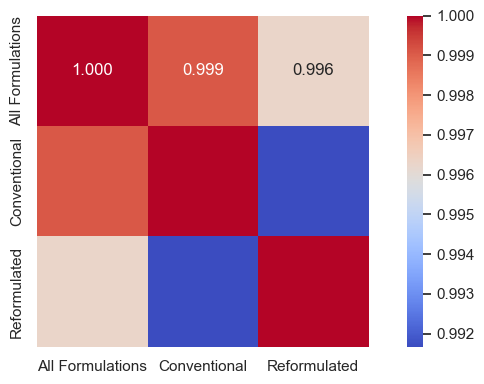

In [14]:
# from this we can see that the prices are closely related to each other, 
# and thus we only discuss all formuated prices in the follow analysis 
labels = ['All Formulations','Conventional','Reformulated']
correlation_matrix = regular_combined_gas_prices[labels].corr()
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".3f", square=True)
plt.tight_layout()
plt.show()


In [16]:
wti = commodity[commodity['Commodity_Simple'] == 'WTI'].rename(columns={'Date_Time': 'Date', 'Value': 'Price'})
wti['Date'] = pd.to_datetime(wti['Date'])  # convert to datetime
wti.to_csv("datathon data/crude_oil/wti.csv", index=False)

BRENT = commodity[commodity['Commodity_Simple'] == 'BRENT'].rename(columns={'Date_Time': 'Date', 'Value': 'Price'})
BRENT['Date'] = pd.to_datetime(BRENT['Date'])  # convert to datetime
BRENT.to_csv("datathon data/crude_oil/BRENT.csv", index=False)


In [26]:
## Sample one date from each week
wti_sampled = wti[wti['Date'].isin(regular_formulated_gas_prices['Date'])].rename({'Price':'Price_sampled'}, axis=1) #na for 129

# Get the average price for each week 
wti_averaged_df = wti.resample('W-MON', on='Date')['Price'].mean().reset_index().rename({'Price':'Price_averaged'}, axis=1)#na for 0

# Get the maximum and minimum price for each week
wti_max_df =  wti.resample('W-MON', on='Date')['Price'].max().reset_index().rename({'Price':'Price_max'}, axis=1) #na for 0
wti_min_df =  wti.resample('W-MON', on='Date')['Price'].min().reset_index().rename({'Price':'Price_min'}, axis=1) #na for 0

print(f"{len(regular_formulated_gas_prices), len(wti_sampled), len(wti_averaged_df), len(wti_max_df), len(wti_min_df)}")

min_date = "2000-01-03"
max_date = "2023-12-25"

# select the date
wti_min = wti_min_df[(wti_min_df['Date']>= min_date) & (wti_min_df['Date'] <= max_date)]
wti_averaged = wti_averaged_df[(wti_averaged_df['Date']>= min_date) & (wti_averaged_df['Date'] <= max_date)]
wti_max = wti_max_df[(wti_max_df['Date']>= min_date) & (wti_max_df['Date'] <= max_date)]

print(f"{len(regular_formulated_gas_prices), len(wti_sampled), len(wti_averaged), len(wti_max), len(wti_min)}")
WTI_gas = pd.merge(regular_formulated_gas_prices, wti_sampled, on='Date', how='inner').merge(wti_averaged, on='Date', how='inner').merge(wti_max, on='Date').merge(wti_min, on='Date')
WTI_gas.rename(columns={'Unit_x':'Unit_gas', 'Unit_y':'Unit_oil'}, inplace=True)


(1252, 1252, 1986, 1986, 1986)
(1252, 1252, 1252, 1252, 1252)


In [18]:
## Sample one date from each week
BRENT_sampled = BRENT[BRENT['Date'].isin(regular_formulated_gas_prices['Date'])].rename({'Price':'Price_sampled'}, axis=1) #na for 129

# Get the average price for each week 
BRENT_averaged_df = BRENT.resample('W-MON', on='Date')['Price'].mean().reset_index().rename({'Price':'Price_averaged'}, axis=1)#na for 0

# Get the maximum and minimum price for each week
BRENT_max_df =  BRENT.resample('W-MON', on='Date')['Price'].max().reset_index().rename({'Price':'Price_max'}, axis=1) #na for 0
BRENT_min_df =  BRENT.resample('W-MON', on='Date')['Price'].min().reset_index().rename({'Price':'Price_min'}, axis=1) #na for 0

print(f"{len(regular_formulated_gas_prices), len(BRENT_sampled), len(BRENT_averaged_df), len(BRENT_max_df), len(BRENT_min_df)}")

min_date = "2000-01-03"
max_date = "2023-12-25"

# select the date
BRENT_min = BRENT_min_df[(BRENT_min_df['Date']>= min_date) & (BRENT_min_df['Date'] <= max_date)]
BRENT_averaged = BRENT_averaged_df[(BRENT_averaged_df['Date']>= min_date) & (BRENT_averaged_df['Date'] <= max_date)]
BRENT_max = BRENT_max_df[(BRENT_max_df['Date']>= min_date) & (BRENT_max_df['Date'] <= max_date)]

print(f"{len(regular_formulated_gas_prices), len(BRENT_sampled), len(BRENT_averaged), len(BRENT_max), len(BRENT_min)}")
BRENT_gas = pd.merge(regular_formulated_gas_prices, BRENT_sampled, on='Date', how='inner').merge(BRENT_averaged, on='Date', how='inner').merge(BRENT_max, on='Date').merge(BRENT_min, on='Date')
BRENT_gas.rename(columns={'Unit_x':'Unit_gas', 'Unit_y':'Unit_oil'}, inplace=True)

(1252, 1252, 1914, 1914, 1914)
(1252, 1252, 1252, 1252, 1252)


### Crude and Gasoline Price

/Users/yangzejia/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/yangzejia/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/yangzejia/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/yangzejia/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future

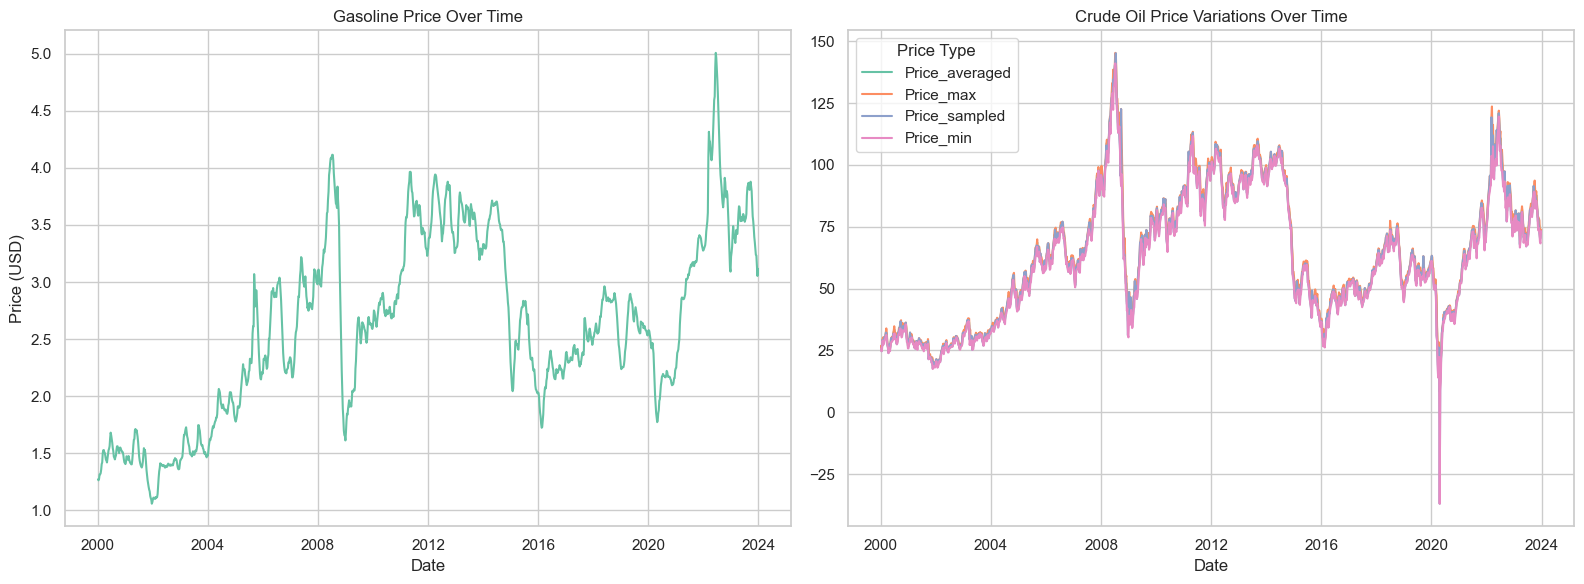

In [19]:
columns_ = ['Date', 'Price', 'Price_averaged', 'Price_max', 'Price_sampled', 'Price_min']
df_melted = WTI_gas[columns_].melt(id_vars='Date', var_name='Price_Type', value_name='Price_Value')

fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharex=True)

# Left subplot: only 'Price'
df_price_only = df_melted[df_melted['Price_Type'] == 'Price']
sns.lineplot(data=df_price_only, x='Date', y='Price_Value', hue='Price_Type', legend=False, ax=axes[0], palette = 'Set2')
axes[0].set_title("Gasoline Price Over Time")
axes[0].set_xlabel("Date")
axes[0].set_ylabel("Price (USD)")

# Right subplot: all others except 'Price'
df_other_prices = df_melted[df_melted['Price_Type'] != 'Price']
sns.lineplot(data=df_other_prices, x='Date', y='Price_Value', hue='Price_Type', ax=axes[1], palette = 'Set2')
axes[1].set_title("Crude Oil Price Variations Over Time")
axes[1].set_xlabel("Date")
axes[1].set_ylabel("")

# Adjust legend
axes[1].legend(title='Price Type')

plt.tight_layout()
plt.show()

### Correlation Test (between absolute values & pct & logreturn)

We conducted a correlation analysis between gasoline prices and various aggregations of crude oil prices—specifically the average, maximum, and minimum weekly crude oil prices. In addition, we evaluated the correlation between their change rates, measured using both log returns and percentage changes.

Interestingly, Brent crude oil exhibited a stronger correlation with US gasoline prices than West Texas Intermediate (WTI), despite WTI being the more regionally representative benchmark for the US market. This suggests that global market dynamics captured by Brent may exert a more immediate influence on gasoline pricing trends than domestic crude oil benchmarks.

In [29]:
columns = ['Price', 'Price_averaged', 'Price_max', 'Price_sampled', 'Price_min']
for col in columns:
    WTI_gas[col + '_pct'] = WTI_gas[col].pct_change()
    WTI_gas[col + "_logreturn"] = np.log(WTI_gas[col] / WTI_gas[col].shift(1))
    BRENT_gas[col + '_pct'] = BRENT_gas[col].pct_change()
    BRENT_gas[col + "_logreturn"] = np.log(BRENT_gas[col] / BRENT_gas[col].shift(1))

/var/folders/x0/l0tbxml95bn0hl8mg3ljsrr40000gn/T/ipykernel_2169/4044896933.py:3: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  WTI_gas[col + '_pct'] = WTI_gas[col].pct_change()
/Users/yangzejia/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/x0/l0tbxml95bn0hl8mg3ljsrr40000gn/T/ipykernel_2169/4044896933.py:5: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  BRENT_gas[col + '_pct'] = BRENT_gas[col].pct_change()
/Users/yangzejia/anaconda3/lib/python3.11/site-packages/

/var/folders/x0/l0tbxml95bn0hl8mg3ljsrr40000gn/T/ipykernel_2169/1551723780.py:24: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


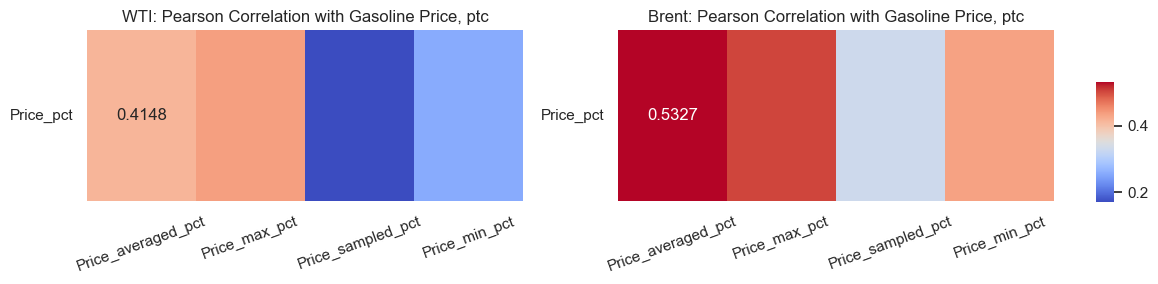

In [30]:
columns_ptc = [col + '_pct' for col in columns]
columns_logreturn = [col + "_logreturn" for col in columns]

wti_correlation_matrix = WTI_gas[columns_ptc].corr(method='pearson').loc[['Price_pct'], columns_ptc[1:]]
bre_correlation_matrix = BRENT_gas[columns_ptc].corr(method='pearson').loc[['Price_pct'], columns_ptc[1:]]

fig, axs = plt.subplots(1, 2, figsize=(12, 3))

# Define a common color range based on both matrices
vmin = min(wti_correlation_matrix.min().min(), bre_correlation_matrix.min().min())
vmax = max(wti_correlation_matrix.max().max(), bre_correlation_matrix.max().max())

# Plot heatmaps without individual colorbars
sns.heatmap(wti_correlation_matrix, annot=True, cmap='coolwarm', fmt=".4f", ax=axs[0], cbar=False, vmin=vmin, vmax=vmax)
axs[0].set_title("WTI: Pearson Correlation with Gasoline Price, ptc")
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=20)
axs[0].set_yticklabels(axs[0].get_yticklabels(), rotation=0)

sns.heatmap(bre_correlation_matrix, annot=True, cmap='coolwarm', fmt=".4f", ax=axs[1], cbar=True, cbar_ax=fig.add_axes([0.92, 0.3, 0.015, 0.4]), vmin=vmin, vmax=vmax)
axs[1].set_title("Brent: Pearson Correlation with Gasoline Price, ptc")
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=20)
axs[1].set_yticklabels(axs[1].get_yticklabels(), rotation=0)

plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()

In [32]:
# Create lagged shifted) versions — shift by 4 if weekly data ≈ 1 month
# Only relevant to short-term weeks
for lag in range(6):
    for col in ['Price_averaged_logreturn']:
        WTI_gas[col + '_lag'] = WTI_gas[col].shift(lag)
        BRENT_gas[col + '_lag'] = BRENT_gas[col].shift(lag)
        Wcorr = WTI_gas[['Price_logreturn', f'{col}_lag']].corr().iloc[0, 1]
        Bcorr = BRENT_gas[['Price_logreturn', f'{col}_lag']].corr().iloc[0, 1]
        print(f"Correlation between price logreturn and WFI previous {lag} weeks {col} : {Wcorr:.4f}")
        print(f"Correlation between price logreturn and BRENT previous {lag} weeks {col} : {Bcorr:.4f}")

Correlation between price logreturn and WFI previous 0 weeks Price_averaged_logreturn : 0.4027
Correlation between price logreturn and BRENT previous 0 weeks Price_averaged_logreturn : 0.5369
Correlation between price logreturn and WFI previous 1 weeks Price_averaged_logreturn : 0.3816
Correlation between price logreturn and BRENT previous 1 weeks Price_averaged_logreturn : 0.4531
Correlation between price logreturn and WFI previous 2 weeks Price_averaged_logreturn : 0.2142
Correlation between price logreturn and BRENT previous 2 weeks Price_averaged_logreturn : 0.2572
Correlation between price logreturn and WFI previous 3 weeks Price_averaged_logreturn : 0.1565
Correlation between price logreturn and BRENT previous 3 weeks Price_averaged_logreturn : 0.2328
Correlation between price logreturn and WFI previous 4 weeks Price_averaged_logreturn : 0.1321
Correlation between price logreturn and BRENT previous 4 weeks Price_averaged_logreturn : 0.1475
Correlation between price logreturn and 

/var/folders/x0/l0tbxml95bn0hl8mg3ljsrr40000gn/T/ipykernel_2169/2926471754.py:56: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.91, 1])


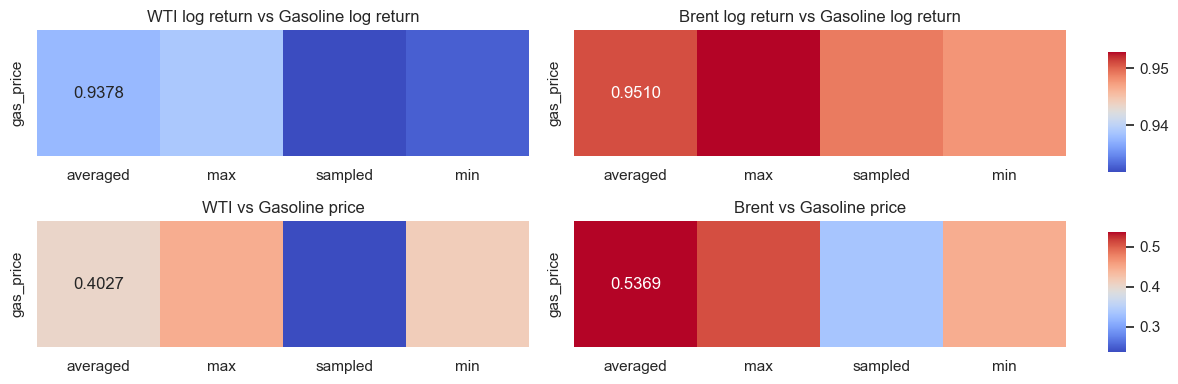

In [33]:
fig, axs = plt.subplots(2, 2, figsize=(12, 4))

columns = [
    'Price',
    'Price_averaged',
    'Price_max', 
    'Price_sampled', 
    'Price_min'
]

col_ab = [col[6:] for col in columns[1:]]

# ---- First row: Log return correlations ----
# Shared vmin/vmax for log return\
wti_correlation_matrix = WTI_gas[columns].corr(method='pearson').loc[['Price'], columns[1:]]
bre_correlation_matrix = BRENT_gas[columns].corr(method='pearson').loc[['Price'], columns[1:]]

vmin_log = min(wti_correlation_matrix.min().min(), bre_correlation_matrix.min().min())
vmax_log = max(wti_correlation_matrix.max().max(), bre_correlation_matrix.max().max())

sns.heatmap(wti_correlation_matrix, annot=True, cmap='coolwarm', fmt=".4f",
            ax=axs[0, 0], cbar=False, vmin=vmin_log, vmax=vmax_log)
axs[0, 0].set_title("WTI log return vs Gasoline log return")
axs[0, 0].set_xticklabels(col_ab)
axs[0, 0].set_yticklabels(['gas_price'])

sns.heatmap(bre_correlation_matrix, annot=True, cmap='coolwarm', fmt=".4f",
            ax=axs[0, 1], cbar=True, cbar_ax=fig.add_axes([0.93, 0.55, 0.015, 0.3]),
            vmin=vmin_log, vmax=vmax_log)
axs[0, 1].set_title("Brent log return vs Gasoline log return")
axs[0, 1].set_xticklabels(col_ab)
axs[0, 1].set_yticklabels(['gas_price'])

# ---- Second row: Raw price correlations ----
# Shared vmin/vmax for raw price

wti_correlation_matrix_logreturn = WTI_gas[columns_logreturn].corr(method='pearson').loc[['Price_logreturn'], columns_logreturn[1:]]
bre_correlation_matrix_logreturn = BRENT_gas[columns_logreturn].corr(method='pearson').loc[['Price_logreturn'], columns_logreturn[1:]]

vmin_raw = min(wti_correlation_matrix_logreturn.min().min(), bre_correlation_matrix_logreturn.min().min())
vmax_raw = max(wti_correlation_matrix_logreturn.max().max(), bre_correlation_matrix_logreturn.max().max())

sns.heatmap(wti_correlation_matrix_logreturn, annot=True, cmap='coolwarm', fmt=".4f",
            ax=axs[1, 0], cbar=False, vmin=vmin_raw, vmax=vmax_raw)
axs[1, 0].set_title("WTI vs Gasoline price")
axs[1, 0].set_xticklabels(col_ab, rotation=0)
axs[1, 0].set_yticklabels(['gas_price'])

sns.heatmap(bre_correlation_matrix_logreturn, annot=True, cmap='coolwarm', fmt=".4f",
            ax=axs[1, 1], cbar=True, cbar_ax=fig.add_axes([0.93, 0.1, 0.015, 0.3]),
            vmin=vmin_raw, vmax=vmax_raw)
axs[1, 1].set_title("Brent vs Gasoline price")
axs[1, 1].set_xticklabels(col_ab, rotation=0)
axs[1, 1].set_yticklabels(['gas_price'])

plt.tight_layout(rect=[0, 0, 0.91, 1])
plt.show()


### Casuality Inference

In [23]:
from statsmodels.tsa.stattools import adfuller

# Suppose you have a time series called ts
results = [
    adfuller(regular_formulated_gas_prices['Price'].dropna()), ## 0.03
    adfuller(wti['Price'].dropna()), #0.13
    adfuller(WTI_gas['Price_averaged'].dropna()), # 0.05
    adfuller(WTI_gas['Price_averaged_pct'].dropna()), ## 4.24
    adfuller(WTI_gas['Price_averaged_logreturn'].dropna())] ## 0.0

for result in results:
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    for key, value in result[4].items():
        print(f'Critical Value ({key}): {value}')


ADF Statistic: -3.0438332993152866
p-value: 0.030998773711803568
Critical Value (1%): -3.4356006420838963
Critical Value (5%): -2.8638586845641063
Critical Value (10%): -2.5680044958343604
ADF Statistic: -2.440288232285304
p-value: 0.13068663135625674
Critical Value (1%): -3.431035214676779
Critical Value (5%): -2.8618428225409547
Critical Value (10%): -2.566931187330754
ADF Statistic: -2.8324565531515997
p-value: 0.05378505529287817
Critical Value (1%): -3.4356260602190356
Critical Value (5%): -2.863869899335344
Critical Value (10%): -2.5680104683371323
ADF Statistic: -17.52944814796318
p-value: 4.2444359727406884e-30
Critical Value (1%): -3.4356006420838963
Critical Value (5%): -2.8638586845641063
Critical Value (10%): -2.5680044958343604
ADF Statistic: -18.86922725555821
p-value: 0.0
Critical Value (1%): -3.4356006420838963
Critical Value (5%): -2.8638586845641063
Critical Value (10%): -2.5680044958343604


### VAR (vector autoregression)

We applied a Vector Autoregression (VAR) model to capture the mutual dynamics between gasoline prices and crude oil prices. Interestingly, when modeling the variables in terms of their absolute values, the coefficients in the VAR model were largely insignificant, suggesting weak short-term interactions.

However, when we transformed the data into log returns—capturing the rate of change rather than magnitude—the model revealed significant coefficients, particularly around 0.5, indicating a moderate and meaningful relationship between the changes in crude oil and gasoline prices. This implies that the interdependence lies more in their movements than in their levels.

To further investigate the directionality of influence, we conducted Granger causality tests. The results consistently showed that crude oil prices Granger-cause gasoline prices, but not necessarily the other way around. This reinforces the understanding that crude oil serves as a leading indicator for gasoline prices, aligning with its upstream role in the fuel supply chain.

In [24]:
# VARs are used to model the mutual relationship between variables.
from statsmodels.tsa.api import VAR

In [37]:
WTI_gas_var = WTI_gas[['Price_logreturn', 'Price_averaged_logreturn']].dropna()
model = VAR(WTI_gas_var)
WFI_results = model.fit(maxlags=15, ic='aic')  # Uses AIC to choose optimal lag

print(WFI_results.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 18, May, 2025
Time:                     11:40:59
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -14.0105
Nobs:                     1248.00    HQIC:                  -14.0464
Log likelihood:           5250.79    FPE:                7.76835e-07
AIC:                     -14.0680    Det(Omega_mle):     7.68193e-07
--------------------------------------------------------------------
Results for equation Price_logreturn
                                 coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------------------
const                               0.000229         0.000489            0.469           0.639
L1.Price_logreturn                  0.456282         0.030974           14.731           

/Users/yangzejia/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [38]:
BRENT_gas_var = BRENT_gas[['Price_pct', 'Price_averaged_pct']].dropna()
model = VAR(BRENT_gas_var)
BRENT_results = model.fit(maxlags=15, ic='aic')  # Uses AIC to choose optimal lag

print(BRENT_results.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 18, May, 2025
Time:                     11:41:02
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -14.5309
Nobs:                     1246.00    HQIC:                  -14.5874
Log likelihood:           5595.16    FPE:                4.46673e-07
AIC:                     -14.6214    Det(Omega_mle):     4.38889e-07
--------------------------------------------------------------------
Results for equation Price_pct
                           coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------------
const                         0.000240         0.000495            0.485           0.627
L1.Price_pct                  0.404556         0.033029           12.249           0.000
L1.Price_averaged_pct   

/Users/yangzejia/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [40]:
WTI_gas_var

,Price_logreturn,Price_averaged_logreturn
1,-0.006309,-0.055715
2,0.010232,0.068203
3,0.029323,0.096018
4,0.000760,-0.046312
5,0.006816,0.007468
...,...,...
1247,-0.015628,-0.009337
1248,-0.002164,-0.012720
1249,-0.029844,-0.065977
1250,-0.026823,0.000085


In [41]:
## Grangar Test -  past values of WFI price provide significant predictive information about gasoline price.
from statsmodels.tsa.stattools import grangercausalitytests

grangercausalitytests(WTI_gas_var[['Price_logreturn', 'Price_averaged_logreturn']], maxlag=10, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=50.2949 , p=0.0000  , df_denom=1247, df_num=1
ssr based chi2 test:   chi2=50.4159 , p=0.0000  , df=1
likelihood ratio test: chi2=49.4258 , p=0.0000  , df=1
parameter F test:         F=50.2949 , p=0.0000  , df_denom=1247, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=28.0686 , p=0.0000  , df_denom=1244, df_num=2
ssr based chi2 test:   chi2=56.3628 , p=0.0000  , df=2
likelihood ratio test: chi2=55.1281 , p=0.0000  , df=2
parameter F test:         F=28.0686 , p=0.0000  , df_denom=1244, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=19.2416 , p=0.0000  , df_denom=1241, df_num=3
ssr based chi2 test:   chi2=58.0505 , p=0.0000  , df=3
likelihood ratio test: chi2=56.7408 , p=0.0000  , df=3
parameter F test:         F=19.2416 , p=0.0000  , df_denom=1241, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=14.3528 , p=0.

/Users/yangzejia/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


{1: ({'ssr_ftest': (50.29493943921821, 2.210729266990063e-12, 1247.0, 1),
   'ssr_chi2test': (50.41593768967342, 1.2437999502864959e-12, 1),
   'lrtest': (49.42576756064045, 2.0602172095965148e-12, 1),
   'params_ftest': (50.29493943921672, 2.2107292669916652e-12, 1247.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (28.068585491861892, 1.1940149128709658e-12, 1244.0, 2),
   'ssr_chi2test': (56.36280269989631, 5.767304761367886e-13, 2),
   'lrtest': (55.128088126017246, 1.0692709412471642e-12, 2),
   'params_ftest': (28.068585491862788, 1.194014912869935e-12, 1244.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (19.241623406628054, 3.375447122731137e-12, 1241.0, 3),
   'ssr_chi2test': (58.05047383917441, 1.5333442389718203e-12, 3),
   'lrtest': (56.740828955036704, 2.9190038094571557e-12, 3),
   'params_ftest': (19.241623406627962, 3.3754471227316047e-12, 1241.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 

In [43]:
from statsmodels.tsa.stattools import grangercausalitytests

WFI_gas_ga = WTI_gas[['Price_averaged_logreturn', 'Price_logreturn']].dropna()
grangercausalitytests(WFI_gas_ga, maxlag=10, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=14.5708 , p=0.0001  , df_denom=1247, df_num=1
ssr based chi2 test:   chi2=14.6059 , p=0.0001  , df=1
likelihood ratio test: chi2=14.5212 , p=0.0001  , df=1
parameter F test:         F=14.5708 , p=0.0001  , df_denom=1247, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=19.5673 , p=0.0000  , df_denom=1244, df_num=2
ssr based chi2 test:   chi2=39.2920 , p=0.0000  , df=2
likelihood ratio test: chi2=38.6866 , p=0.0000  , df=2
parameter F test:         F=19.5673 , p=0.0000  , df_denom=1244, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=9.0627  , p=0.0000  , df_denom=1241, df_num=3
ssr based chi2 test:   chi2=27.3413 , p=0.0000  , df=3
likelihood ratio test: chi2=27.0461 , p=0.0000  , df=3
parameter F test:         F=9.0627  , p=0.0000  , df_denom=1241, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=7.1000  , p=0.

/Users/yangzejia/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


{1: ({'ssr_ftest': (14.570800762795628, 0.0001416158217561653, 1247.0, 1),
   'ssr_chi2test': (14.605854814350069, 0.00013250223950838375, 1),
   'lrtest': (14.521181366433666, 0.00013859247008996721, 1),
   'params_ftest': (14.57080076279441, 0.0001416158217562634, 1247.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (19.567338112557557, 4.294792587922284e-09, 1244.0, 2),
   'ssr_chi2test': (39.29196993984628, 2.9366834519474322e-09, 2),
   'lrtest': (38.68659542631849, 3.974774924703891e-09, 2),
   'params_ftest': (19.567338112557366, 4.294792587923261e-09, 1244.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (9.062655062320685, 6.162900021779556e-06, 1241.0, 3),
   'ssr_chi2test': (27.34132196078053, 4.992860927930262e-06, 3),
   'lrtest': (27.046127266851727, 5.757709240814705e-06, 3),
   'params_ftest': (9.062655062320909, 6.162900021777651e-06, 1241.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0